- 31 jul 2024

In [1]:
import numpy as np, pandas as pd
import scipy.stats as ss
from scipy.stats import t
import matplotlib.pyplot as plt
from math import comb

En el caso cuando la media es 0 y la varianza 1, tenemos la distribución **Normal estándar**:

$$
f(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{(x )^2}{2}}
$$

<img src="normal_std.png" alt="Alt text" style="width: 600px;"/>

podemos usar `.ppf()` para saber el valor donde se acumula cierta probabilidad 

In [2]:
normal_z = ss.norm(loc=0, scale=1)
print(normal_z.ppf(0.025))
print(normal_z.ppf(0.975))
print(normal_z.ppf(0.5))

-1.9599639845400545
1.959963984540054
0.0


In [3]:
normal_z.cdf(-1.9599639845400545)

0.024999999999999977

In [4]:
normal_z.cdf(1.9599639845400545)

0.975

In [5]:
#generando muestras de una distribución normal estándar:
datos_normales = normal_z.rvs(size=50000)
dn = pd.Series(datos_normales)
dn.describe()

count    50000.000000
mean         0.005483
std          1.000961
min         -4.326119
25%         -0.670355
50%          0.004668
75%          0.682791
max          4.159680
dtype: float64

In [6]:
#USO DE función quantile() para saber el valor (x) en el que se acumula cierto valor de probabilidad
dn.quantile(0.975)

1.9665878505645582

In [7]:
normal_z.ppf(0.75)

0.6744897501960817

###  Exponencial

La distribución exponencial es una distribución que se utiliza para describir el tiempo que debemos esperar hasta que ocurra un evento. Es comúnmente utilizada en situaciones donde los eventos ocurren de manera aleatoria e independiente, pero a una tasa constante en el tiempo.

Un ejemplo es el tiempo que tarda en llegar el próximo cliente a un mostrador de atención, o el tiempo que tarda en fallar un componente electrónico.

La distribución exponencial se caracteriza por un parámetro lambda (λ), que es la tasa promedio de ocurrencia del evento por unidad de tiempo. Cuanto mayor sea λ, más frecuentemente ocurre el evento.

Su **función de distribución (CDF)** es:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d055cf11e7e6b868d96d7108787a1492e1c3b890)


Su **función de densidad (PDF)** es:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/b348859fe222db6887e8b7d91380a64fe3850738)

para x > 0


#### Ejemplo 1: 

Si sabemos que llega un cliente a un mostrador cada 10 minutos (en promedio), y podemos modelar la llegada de clientes mediante
una distribución exponencial, ¿cuál es la probabilidad de esperar menos de 5 minutos entre clientes?

In [8]:
#definimos la tasa promedio de llegada de clientes (lambda)
lambda_ = 1/10 # 1 cliente cada 10 minutos

#crear una instancia de una distrib exponencial:
dist_exponencial = ss.expon(scale = 1/lambda_) # 1/lambda

#Calcular la proba de esperar menos de 5 minutos entre clientes.
# P(T<5) = F(5) = cdf(5)
prob_menor_5_min = dist_exponencial.cdf(5)


print(f"La probabilidad de esperar menos de 5 minutos entre clientes es: {prob_menor_5_min:.4f}")

La probabilidad de esperar menos de 5 minutos entre clientes es: 0.3935


#### Ejemplo 2: 

Ahora supongamos que queremos (y podemos) modelar el tiempo de espera entre llegadas sucesivas de autobuses en una parada mediante una distribución exponencial.  Supongamos que la tasa de llegadas es de  0.1 por minuto (1 cada 10 min). ¿Cual es la probabilidad de esperar menos de 5 minutos?


In [9]:
#definimos la tasa promedio de llegada de la distrib exponencial:
tasa_llegada = 0.1

#crear una instancia de una distrib exponencial:
dist_exp= ss.expon(scale = 1/tasa_llegada)

#Calcular la prob de esperar menos de 5 minutos:
prob_menor_5_min = dist_exp.cdf(5)

print(f"Probabilidad de esperar menos de 5 minutos entre llegada de autobuses:{prob_menor_5_min:.2f}")

Probabilidad de esperar menos de 5 minutos entre llegada de autobuses:0.39


In [10]:
dist_exp.mean()

10.0

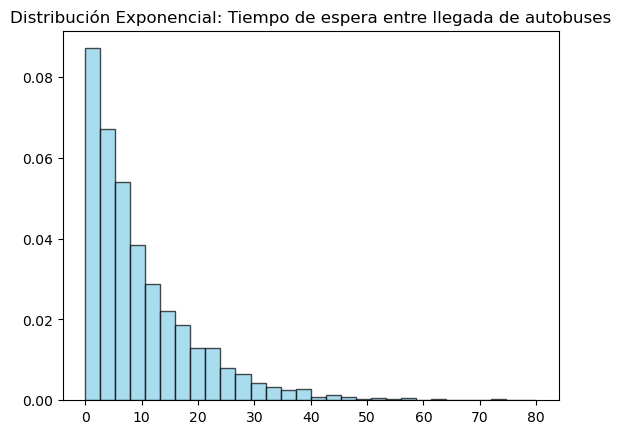

In [11]:
# Generando muestras de una Distribución exponencial:

# Generamos una muestra de tamaño 5000 de tiempos de espera entre llegadas de autobuses
muestra_tiempos_espera = dist_exp.rvs(size=5000)

# Graficamos la densidad de probabilidad
plt.hist(muestra_tiempos_espera, density=True, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribución Exponencial: Tiempo de espera entre llegada de autobuses')
plt.show()

### Distribución exponencial para diferentes valores de lambda

<img src="exponencial_g.png" alt="Alt text" style="width: 600px;"/>

## t de Student
La distribución t de Student es una distribución de probabilidad que se utiliza en estadística para estimar parámetros poblacionales cuando el tamaño de la muestra es pequeño y la varianza es desconocida.

La distribución t de Student tiene una forma similar a la distribución normal, pero con colas más amplias. Esto significa que en muestras pequeñas, es más probable observar valores extremos.

![](https://economipedia.com/wp-content/uploads/Captura-de-pantalla-2019-10-12-a-les-16.13.15.png)

Las características principales de la distribución t son:

- Simetría alrededor de cero: La distribución t es simétrica alrededor de cero, lo que significa que la media, la mediana y la moda son todas iguales y están en el centro.

- Dependencia del tamaño de la muestra: A medida que el tamaño de la muestra aumenta, la distribución t se acerca cada vez más a una distribución normal estándar.

- Dependencia de los grados de libertad: La forma de la distribución t depende de los grados de libertad, que están relacionados con el tamaño de la muestra. Cuantos más grados de libertad, más se asemeja la distribución t a una normal.

La distribución t de Student nos permite hacer inferencias sobre la media de la población (o de dos poblaciones) cuando el tamaño de la muestra es pequeño y la varianza desconocida.

Su **función de densidad (PDF)** es:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/b7166fd67d01274ccaa6c6002822fec5062c898c)


donde $\Gamma$ es la función [gamma](https://en.wikipedia.org/wiki/Gamma_function)

-- Hasta aquí clase 31 julio

## Concepto: Prueba de hipótesis

Una prueba de hipótesis es un método estadístico que permite probar suposiciones (hipótesis) sobre un parámetro poblacional basado en datos de una muestra. La esencia de una prueba de hipótesis está en determinar si hay suficiente evidencia en los datos de muestra para apoyar una creencia de interés (hipótesis alternativa) sobre la población de la cual se extrajo la muestra, contra una creencia predeterminada (hipótesis nula).

### Términos y conceptos Clave:
- **Hipótesis Nula ($H_0$)**: típicamente una declaración de "sin efecto" o "sin diferencia".
- **Hipótesis Alternativa ($H_1$ o $H_a$)**: La afirmación que deseas probar, indicando algún efecto o diferencia.
- **Nivel de Significancia ($\alpha$)**: La probabilidad de rechazar la hipótesis nula cuando es verdadera (error de Tipo I). Las elecciones comunes son 0.05, 0.01.
- **Valor P**: La probabilidad, bajo la hipótesis nula, de obtener un resultado igual o más extremo que lo que se observó realmente.
- **Decisión**: Rechazas la hipótesis nula si el valor p es menor o igual a $\alpha$, indicando que los datos observados son inconsistentes con la hipótesis nula.

### Ejemplo 1:
Imaginemos que tenemos una moneda y queremos probar si es justa (es decir, tiene la misma probabilidad de caer en sol o águila). Configuramos nuestra prueba de hipótesis:

- **Hipótesis Nula ($H_0$)**: La moneda es justa ($P(sol) = 0.5$).
- **Hipótesis Alternativa ($H_a$)**: La moneda no es justa ($P(sol) \neq 0.5$).

Lanzamos la moneda 100 veces para probar nuestra hipótesis, y observamos 60 soles y 40 águilas.

- **Estadístico de Prueba**: Calculamos el número de soles para ver si se desvía "significativamente" de lo que esperaríamos con una moneda justa.
- **Nivel de Significancia ($\alpha$)**: Elegimos $\alpha = 0.05$, indicando que estamos dispuestos a aceptar un 5% de probabilidad de rechazar incorrectamente la hipótesis nula.

Después de realizar la prueba estadística (en este caso una prueba binomial), se calcula un valor p.

- **Resultado**: Si el valor p es menor que 0.05, rechazamos la hipótesis nula, sugiriendo que la moneda podría no ser justa. Si el valor p es mayor que 0.05, no hay suficiente evidencia para rechazar la hipótesis nula.


In [ ]:
# ANDERSON DARLING
# KOLMOGOROV SMIRNOFF
# JARQUE BERA

### Ejemplo 2:
Queremos investigar si dos grupos de estudiantes, (uno que estudia con música y otro en silencio), tienen diferentes puntajes promedio en una prueba de matemáticas. Queremos saber si estudiar con música afecta el rendimiento en la prueba, es decir, si la media de los puntajes de los dos grupos es **significativamente diferente**.

### Planteamiento de la Hipótesis:

- **Hipótesis Nula ($H_0$)**: La media de los puntajes de las pruebas para ambos grupos es igual. Esto se puede expresar como $\mu_1 = \mu_2$, donde $\mu_1$ es la media de los puntajes del grupo que estudia con música y $\mu_2$ la del grupo que estudia en silencio.
  
- **Hipótesis Alternativa ($H_a$)**: La media de los puntajes de las pruebas para los dos grupos no es igual, es decir, $\mu_1 \neq \mu_2$.

### Datos:

Supongamos que realizamos la prueba a 30 estudiantes en cada grupo y obtenemos los siguientes resultados:

- Grupo con música: distribución Normal,  con media = 75, Desviación estándar = 10.
- Grupo sin música: distribución Normal,  con media = 80, Desviación estándar = 12.

### Test Estadístico:

Para comparar las medias de dos grupos independientes con distribuciones normales, utilizamos una **prueba t de Student para muestras independientes**. Esta prueba evalúa si las medias de dos grupos son **estadísticamente** diferentes, considerando la variabilidad dentro de cada grupo y el tamaño de las muestras.

### Cálculo del Valor p:

Se realiza la prueba introduciendo las medias, desviaciones estándar y tamaños de muestra de ambos grupos. Este test proporciona un **valor p**.

### Interpretación:

- Si el **valor p** es menor que el nivel de significancia elegido ($\alpha$, por ejemplo, 0.05), rechazamos la hipótesis nula. Esto indicaría que hay suficiente evidencia para afirmar que estudiar con música tiene un efecto significativo en el rendimiento de las pruebas de matemáticas.
  
- Si el **valor p** es mayor que $\alpha$, no rechazamos la hipótesis nula. Esto significaría que no hay suficiente evidencia para afirmar que la media de los puntajes de las pruebas difiere entre los dos grupos.


In [67]:
#Simular los datos para ambos grupos
np.random.seed(42)  # para asegurar reproducibilidad

# Datos del grupo que estudia con música
mu_musica = 75
sigma_musica = 10
n_musica = 30
grupo_musica = np.random.normal(mu_musica, sigma_musica, n_musica)
#Datos del grupo que estudia sin música:

mu_sin_musica = 80
sigma_sin_musica = 12
n_sin_musica = 30
grupo_sin_musica = np.random.normal(mu_sin_musica, sigma_sin_musica, n_sin_musica)

#Realizar un prueba t para 2 muestras independientes:
t_stat, p_val = ss.ttest_ind(grupo_musica, grupo_sin_musica)

print(f"Estadístico t: {t_stat:.2f}")
print(f"Valor p: {p_val:.4f}")

# Interpretación del resultado
alpha = 0.05
if p_val < alpha:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa entre los grupos.")
else:
    print("No rechazamos la hipótesis nula: No hay una diferencia significativa entre los grupos.")


Estadístico t: -2.07
Valor p: 0.0427
Rechazamos la hipótesis nula: Hay una diferencia significativa entre los grupos.


In [ ]:
#otra forma de verlo es mediante el estadístico de prueba:


In [ ]:
# Si el estadístico de prueba supera el 'valor crítico' determinado por la distribución (y por alpha), 
# entonces cae en la región de rechazo:

<img src="student_df.png" alt="Alt text" style="width: 600px;"/>

In [ ]:
#En nuestro caso, el estadístico de prueba es:

<img src="estad_t.png" alt="Alt text" style="width: 300px;"/>

In [68]:
grupo_musica

array([79.96714153, 73.61735699, 81.47688538, 90.23029856, 72.65846625,
       72.65863043, 90.79212816, 82.67434729, 70.30525614, 80.42560044,
       70.36582307, 70.34270246, 77.41962272, 55.86719755, 57.75082167,
       69.37712471, 64.8716888 , 78.14247333, 65.91975924, 60.87696299,
       89.65648769, 72.742237  , 75.67528205, 60.75251814, 69.55617275,
       76.1092259 , 63.49006423, 78.75698018, 68.9936131 , 72.0830625 ])

In [69]:
grupo_musica.mean()

73.11853104148963

In [70]:
grupo_sin_musica.mean()

78.5460503565207

In [71]:
grupo_musica.var() #varianza muestral --> s^2

78.30111837201301

In [72]:
grupo_sin_musica.var()

120.67962134972501

In [73]:
numerador = grupo_musica.mean() - grupo_sin_musica.mean()
denominador = np.sqrt(grupo_musica.var()/30 + grupo_sin_musica.var()/30)
res = numerador/denominador
res

-2.107446141574803

In [74]:
t.ppf(0.975, 58)  #58 = n1+n2 -2 = 60-2 = 58

2.0017174841452356

In [75]:
abs(res) > t.ppf(0.025, 2*n_musica-2)

True

In [59]:
## ---> rechazar la hipótesis nula y concluimos que sí hay diferencia

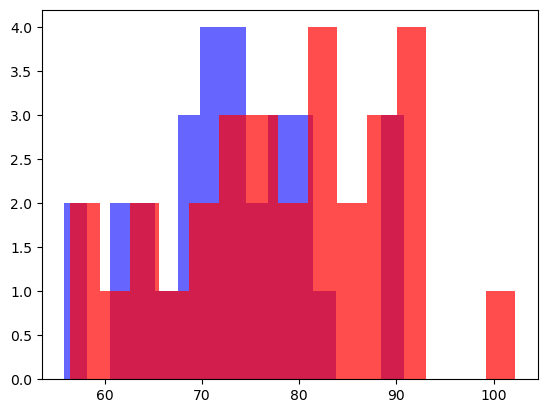

In [77]:
_=plt.hist(grupo_musica, bins=15, color = 'b', alpha=0.6)
_=plt.hist(grupo_sin_musica, bins=15, color = 'r', alpha=0.7)